# Find Model For profit of 50 startups data

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [146]:
%pip install scipy==1.6.0

%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sn
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [148]:
startup1=pd.read_csv('50_Startups.csv')

In [149]:
startup1.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [150]:
startup=startup1.drop(['State'],axis=1)

In [151]:
startup.shape

(50, 4)

In [152]:
startup.head(5)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [153]:
startup.columns=['RDS','admin','markspend','profit']

In [154]:
startup.head(4)

,RDS,admin,markspend,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99


In [155]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RDS        50 non-null     float64
 1   admin      50 non-null     float64
 2   markspend  50 non-null     float64
 3   profit     50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [156]:
startup.isna().sum() # checking missing value

RDS          0
admin        0
markspend    0
profit       0
dtype: int64

# Correlation Matrix

In [157]:
startup.corr()

,RDS,admin,markspend,profit
RDS,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
markspend,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


[*]From observation of above Correlation matrix,
we can say that all the features are only independent of each other (admin,markspend and RDS)
there is strong relationship between profit and RDS which we needed for good prediction.
but also we can see there is no relation between admin and profit
Below is the Pictorial representation of the same 

Scatterplot between variables along with histograms

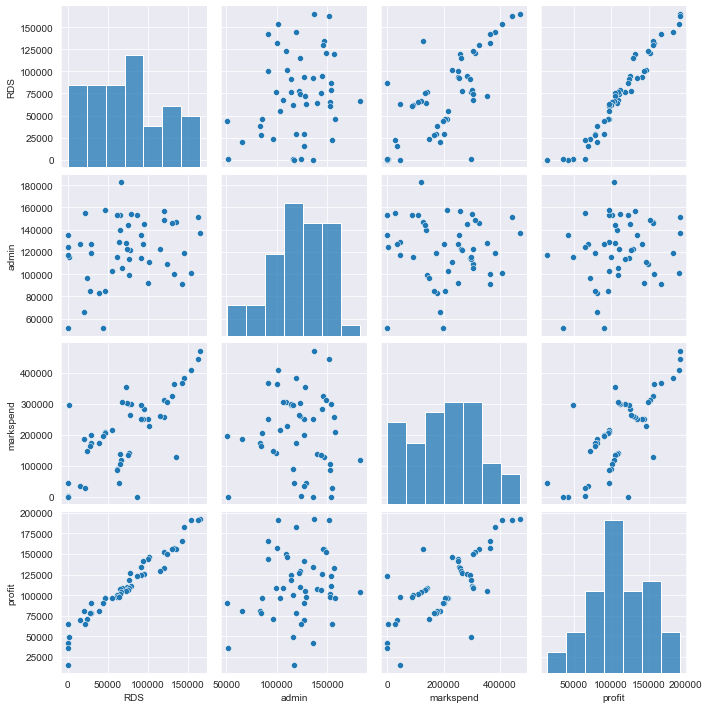

In [158]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [159]:
startup.head(1)

,RDS,admin,markspend,profit
0,165349.2,136897.8,471784.1,192261.83


# Preparing Model

In [160]:
Profit_model=smf.ols('profit~RDS+admin+markspend',data=startup).fit()

In [161]:
Profit_model.rsquared

0.9507459940683246

In [162]:
Profit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           4.53e-30
Time:                        09:07:56   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
markspend      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Above information we can see admin has very less relationship with profit

In [163]:
Profit_model.params

Intercept    50122.192990
RDS              0.805715
admin           -0.026816
markspend        0.027228
dtype: float64

In [164]:
print(Profit_model.tvalues,'\n',Profit_model.pvalues)

Intercept     7.626218
RDS          17.846374
admin        -0.525507
markspend     1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
admin        6.017551e-01
markspend    1.047168e-01
dtype: float64


In [165]:
# R squared values
(Profit_model.rsquared,Profit_model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Model

In [166]:
Profit_A=smf.ols('profit~admin',data=startup).fit()
print(Profit_A.tvalues,Profit_A.pvalues)

Intercept    3.040044
admin        1.419493
dtype: float64 Intercept    0.003824
admin        0.162217
dtype: float64


In [167]:
Profit_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 08 Mar 2022   Prob (F-statistic):              0.162
Time:                        09:07:59   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The P value shows that there is no signinficance role  of admin feature in predicting profit

In [168]:
Profit_M=smf.ols('profit~markspend',data=startup).fit()

In [169]:
Profit_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           4.38e-10
Time:                        09:08:01   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
markspend      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
Profit_R=smf.ols('profit~RDS',data=startup).fit()

In [171]:
Profit_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           3.50e-32
Time:                        09:08:02   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RDS            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# from Profit_R we get the probability for RDS 0 so we can say that profit is completely depend upon RDS

In [172]:
Profit_AM=smf.ols('profit~admin+markspend',data=startup).fit()

In [173]:
Profit_AM.rsquared

0.6097229746770663

In [174]:
Profit_AM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.50e-10
Time:                        09:08:04   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
admin          0.3237      0.131      2.468      0.017       0.060       0.588
markspend      0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
Profit_RM=smf.ols('profit~RDS+markspend',data=startup).fit()

In [176]:
Profit_RM.rsquared

0.9504503015559763

In [177]:
Profit_RM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.16e-31
Time:                        09:08:08   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RDS            0.7966      0.041     19.266      0.000       0.713       0.880
markspend      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
Profit_RA=smf.ols('profit~admin+RDS',data=startup).fit()

In [179]:
Profit_RA.rsquared

0.9478129385009173

In [180]:
Profit_RA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           7.29e-31
Time:                        09:08:10   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
admin         -0.0530      0.049     -1.073      0.289      -0.152       0.046
RDS            0.8621      0.030     28.589      0.000       0.801       0.923
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF its only for features

In [181]:
rsq_rds=smf.ols('RDS~admin+markspend',data=startup).fit().rsquared
vif_rds=1/(1-rsq_rds)

In [182]:
rsq_admin=smf.ols('admin~RDS+markspend',data=startup).fit().rsquared
vif_admin=1/(1-rsq_rds)

In [183]:
rsq_markspend=smf.ols('markspend~RDS+admin',data=startup).fit().rsquared
vif_markspend=1/(1-rsq_rds)

In [184]:
vif_rds,vif_admin,vif_markspend

(2.4689030699947017, 2.4689030699947017, 2.4689030699947017)

In [185]:
data={'Variables':['markspend','RDS','admin'],'Vif':[vif_markspend,vif_admin,vif_rds]}
Vif_frame=pd.DataFrame(data)
Vif_frame

,Variables,Vif
0,markspend,2.468903
1,RDS,2.468903
2,admin,2.468903


# Test For Normality of Residual(Q_Q plot)


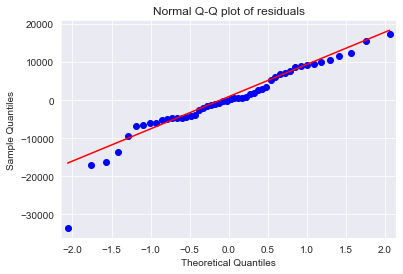

In [186]:
qqplot=sn.qqplot(Profit_model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual plot for Homoscedasticity

In [187]:
def get_standardize_values(vals):
    return (vals-vals.mean())/vals.std()

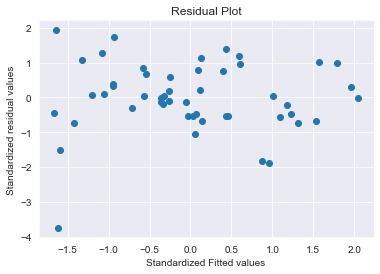

In [188]:
plt.scatter(get_standardize_values(Profit_model.fittedvalues),
            get_standardize_values(Profit_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

By above graph we can say that predicted values and error are now showing any relation

# Residual Vs Regression

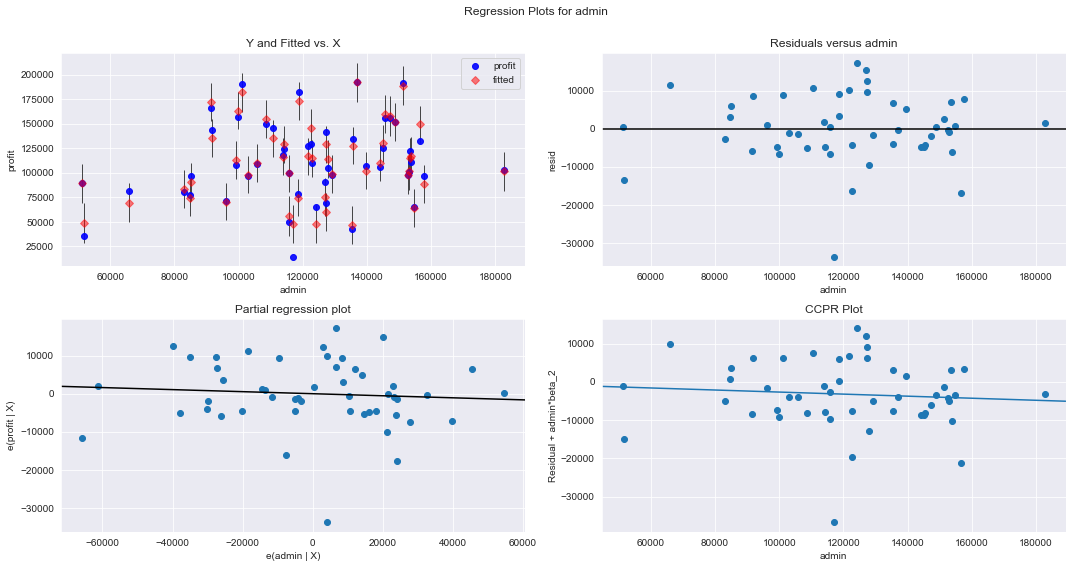

In [189]:
fig = plt.figure(figsize=(15,8))
fig = sn.graphics.plot_regress_exog(Profit_model, "admin", fig=fig)
plt.show()

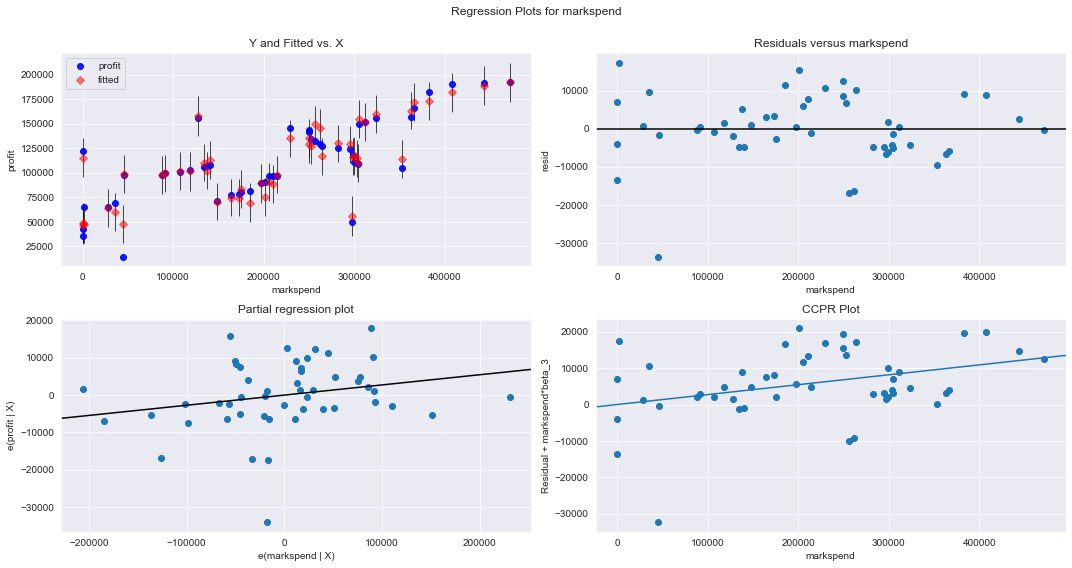

In [190]:
fig = plt.figure(figsize=(15,8))
fig = sn.graphics.plot_regress_exog(Profit_model, "markspend", fig=fig)
plt.show()

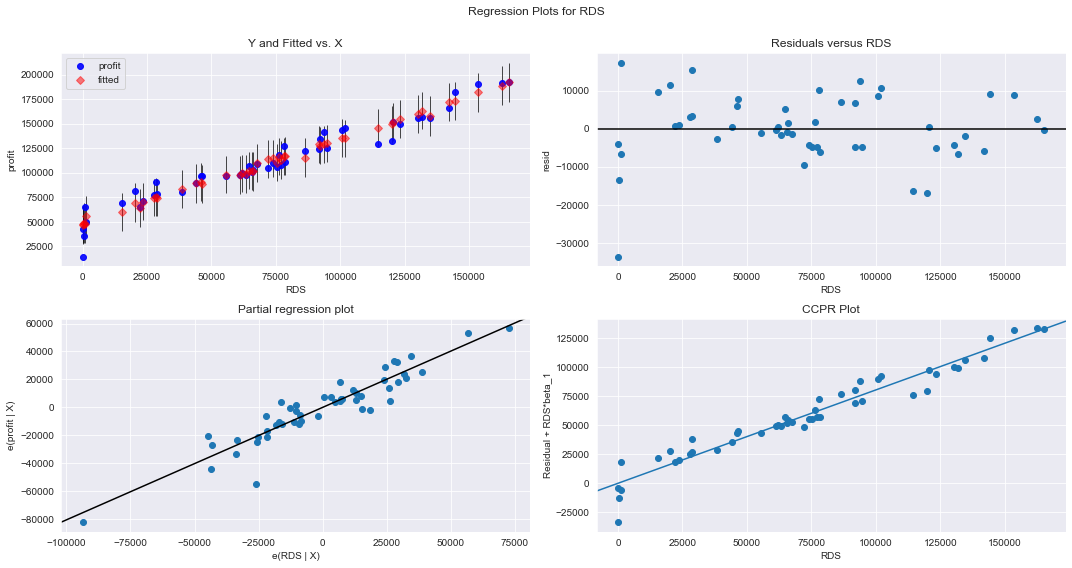

In [191]:
fig = plt.figure(figsize=(15,8))
fig = sn.graphics.plot_regress_exog(Profit_model, "RDS", fig=fig)
plt.show()

In [192]:
Profit_RM.rsquared

0.9504503015559763

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cooks Distance

In [193]:
(c,_)=Profit_RM.get_influence().cooks_distance

In [194]:
x=np.arange(len(startup))
x


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

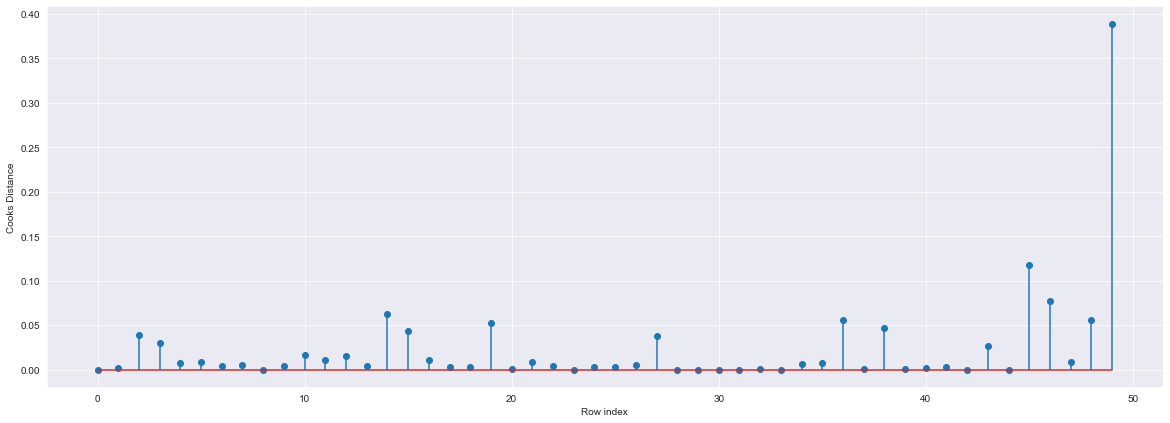

In [195]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [196]:
(np.argmax(c),np.max(c))

(49, 0.3894886227924918)

In [197]:
startup[startup.index.isin([49])]

,RDS,admin,markspend,profit
49,0.0,116983.8,45173.06,14681.4


# High Influence Points

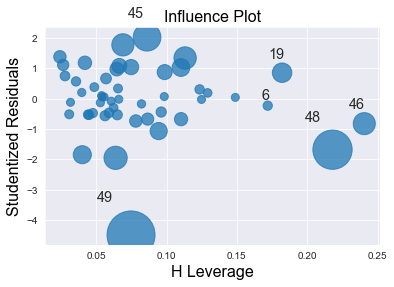

In [198]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(Profit_model)
plt.show()

In [199]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff


0.30000000000000004

# The Average cut off is 0.30 so there are no outliers we dont need to delete any records

# Improving the model

In [200]:
startup_new=startup

In [201]:
startup1=startup_new.drop(startup_new.index[[49]],axis=0).reset_index(drop=True)

In [207]:
startup1

,RDS,admin,markspend,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [216]:
k = startup1.shape[1]
n = startup1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff



0.30612244897959184

# Created model profit~markspend+RDS

In [202]:
Profit_final=smf.ols('profit~markspend+RDS',data=startup1).fit()

Profit_final.rsquared

0.9610856807456628

In [203]:
Profit_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           3.74e-33
Time:                        09:09:20   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
markspend      0.0274      0.013      2.104      0.041       0.001       0.054
RDS            0.7754      0.035     22.136      0.000       0.705       0.846
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Created model with profit~admin,markspend,RDS
but we get higher p value,even though we have higher R squared value we can not consider this model

In [204]:
Profit_final2=smf.ols('profit~admin+markspend+RDS',data=startup1).fit()
Profit_final2.rsquared

0.9613162435129847

In [205]:
Profit_final2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           8.85e-32
Time:                        09:09:33   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
markspend      0.0252      0.014      1.825      0.075      -0.003       0.053
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Improving the model profit~markspend+RDS

In [230]:
(c_f,_)=Profit_final.get_influence().cooks_distance

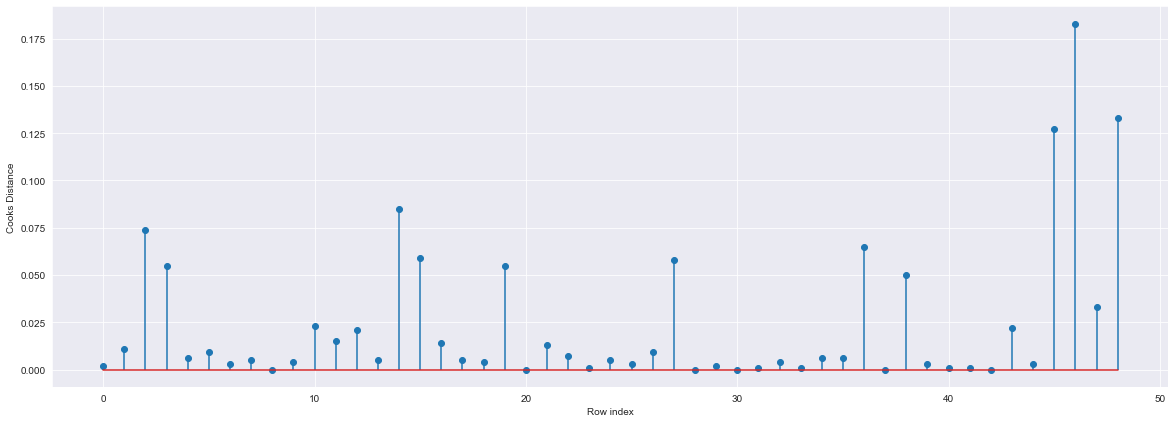

In [229]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(startup1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [231]:
(np.argmax(c_f),np.max(c_f))

(46, 0.18337556491338633)

In [232]:
startup2=startup1.drop(startup1.index[[46]],axis=0).reset_index()

In [236]:
Profit_final1=smf.ols('profit~markspend+RDS',data=startup2).fit()

In [238]:
Profit_final1.rsquared

0.9603203117008039

In [252]:
(c_f,_)=Profit_final1.get_influence().cooks_distance
(np.argmax(c_f),np.max(c_f))

(47, 0.14544403432423827)

In [267]:
startup3=startup2
startup4=startup3.drop(startup3.index[[47]],axis=0)
startup4.reset_index().head(10)

,level_0,index,RDS,admin,markspend,profit
0,0,0,165349.20,136897.80,471784.10,192261.83
1,1,1,162597.70,151377.59,443898.53,191792.06
2,2,2,153441.51,101145.55,407934.54,191050.39
3,3,3,144372.41,118671.85,383199.62,182901.99
4,4,4,142107.34,91391.77,366168.42,166187.94
5,5,5,131876.90,99814.71,362861.36,156991.12
6,6,6,134615.46,147198.87,127716.82,156122.51
7,7,7,130298.13,145530.06,323876.68,155752.60
8,8,8,120542.52,148718.95,311613.29,152211.77
9,9,9,123334.88,108679.17,304981.62,149759.96


In [270]:
Profit_final2=smf.ols('profit~markspend+RDS',data=startup4).fit()
Profit_final.rsquared

0.9610856807456628

In [271]:
(c_f,_)=Profit_final2.get_influence().cooks_distance
(np.argmax(c_f),np.max(c_f))

(45, 0.12080904032648022)

In [273]:

startup5=startup4.drop(startup4.index[[45]],axis=0)
startup5.reset_index().head(10)

,level_0,index,RDS,admin,markspend,profit
0,0,0,165349.20,136897.80,471784.10,192261.83
1,1,1,162597.70,151377.59,443898.53,191792.06
2,2,2,153441.51,101145.55,407934.54,191050.39
3,3,3,144372.41,118671.85,383199.62,182901.99
4,4,4,142107.34,91391.77,366168.42,166187.94
5,5,5,131876.90,99814.71,362861.36,156991.12
6,6,6,134615.46,147198.87,127716.82,156122.51
7,7,7,130298.13,145530.06,323876.68,155752.60
8,8,8,120542.52,148718.95,311613.29,152211.77
9,9,9,123334.88,108679.17,304981.62,149759.96


In [274]:
Profit_final3=smf.ols('profit~markspend+RDS',data=startup5).fit()
Profit_final.rsquared

0.9610856807456628

In [275]:
(c_f,_)=Profit_final3.get_influence().cooks_distance
(np.argmax(c_f),np.max(c_f))

(19, 0.1311526446834585)

In [276]:
startup6=startup5.drop(startup5.index[[19]],axis=0)
startup6.reset_index().head(10)

,level_0,index,RDS,admin,markspend,profit
0,0,0,165349.20,136897.80,471784.10,192261.83
1,1,1,162597.70,151377.59,443898.53,191792.06
2,2,2,153441.51,101145.55,407934.54,191050.39
3,3,3,144372.41,118671.85,383199.62,182901.99
4,4,4,142107.34,91391.77,366168.42,166187.94
5,5,5,131876.90,99814.71,362861.36,156991.12
6,6,6,134615.46,147198.87,127716.82,156122.51
7,7,7,130298.13,145530.06,323876.68,155752.60
8,8,8,120542.52,148718.95,311613.29,152211.77
9,9,9,123334.88,108679.17,304981.62,149759.96


In [281]:
Profit_final4=smf.ols('profit~markspend+RDS',data=startup6).fit()
Profit_final4.rsquared

0.9624820303388749

In [278]:
(c_f,_)=Profit_final4.get_influence().cooks_distance
(np.argmax(c_f),np.max(c_f))

(26, 0.14998982219852047)

In [280]:
startup7=startup6.drop(startup6.index[[26]],axis=0)
startup7.reset_index().head(10)

,level_0,index,RDS,admin,markspend,profit
0,0,0,165349.20,136897.80,471784.10,192261.83
1,1,1,162597.70,151377.59,443898.53,191792.06
2,2,2,153441.51,101145.55,407934.54,191050.39
3,3,3,144372.41,118671.85,383199.62,182901.99
4,4,4,142107.34,91391.77,366168.42,166187.94
5,5,5,131876.90,99814.71,362861.36,156991.12
6,6,6,134615.46,147198.87,127716.82,156122.51
7,7,7,130298.13,145530.06,323876.68,155752.60
8,8,8,120542.52,148718.95,311613.29,152211.77
9,9,9,123334.88,108679.17,304981.62,149759.96


In [282]:
Profit_final5=smf.ols('profit~markspend+RDS',data=startup7).fit()
Profit_final5.rsquared

0.9656107252294405

In [283]:
(c_f,_)=Profit_final5.get_influence().cooks_distance
(np.argmax(c_f),np.max(c_f))

(14, 0.10730803791817789)

In [290]:
startup8=startup7.drop(startup7.index[[14]],axis=0)
startup8.reset_index().head(10)

,level_0,index,RDS,admin,markspend,profit
0,0,0,165349.20,136897.80,471784.10,192261.83
1,1,1,162597.70,151377.59,443898.53,191792.06
2,2,2,153441.51,101145.55,407934.54,191050.39
3,3,3,144372.41,118671.85,383199.62,182901.99
4,4,4,142107.34,91391.77,366168.42,166187.94
5,5,5,131876.90,99814.71,362861.36,156991.12
6,6,6,134615.46,147198.87,127716.82,156122.51
7,7,7,130298.13,145530.06,323876.68,155752.60
8,8,8,120542.52,148718.95,311613.29,152211.77
9,9,9,123334.88,108679.17,304981.62,149759.96


In [294]:
Profit_final6=smf.ols('profit~markspend+RDS',data=startup8).fit()
Profit_final6.rsquared

0.9702709574748796

In [295]:
(c_f,_)=Profit_final6.get_influence().cooks_distance
(np.argmax(c_f),np.max(c_f))


(14, 0.0980391495924458)

In [296]:
startup9=startup8.drop(startup8.index[[14]],axis=0)
startup9.reset_index().head(10)

,level_0,index,RDS,admin,markspend,profit
0,0,0,165349.20,136897.80,471784.10,192261.83
1,1,1,162597.70,151377.59,443898.53,191792.06
2,2,2,153441.51,101145.55,407934.54,191050.39
3,3,3,144372.41,118671.85,383199.62,182901.99
4,4,4,142107.34,91391.77,366168.42,166187.94
5,5,5,131876.90,99814.71,362861.36,156991.12
6,6,6,134615.46,147198.87,127716.82,156122.51
7,7,7,130298.13,145530.06,323876.68,155752.60
8,8,8,120542.52,148718.95,311613.29,152211.77
9,9,9,123334.88,108679.17,304981.62,149759.96


In [297]:
Profit_final7=smf.ols('profit~markspend+RDS',data=startup9).fit()
Profit_final7.rsquared

0.9748760143665132

In [298]:
(c_f,_)=Profit_final7.get_influence().cooks_distance
(np.argmax(c_f),np.max(c_f))



(32, 0.11596317345792864)

In [299]:
startup10=startup9.drop(startup9.index[[32]],axis=0)
startup10.reset_index().head(10)

,level_0,index,RDS,admin,markspend,profit
0,0,0,165349.20,136897.80,471784.10,192261.83
1,1,1,162597.70,151377.59,443898.53,191792.06
2,2,2,153441.51,101145.55,407934.54,191050.39
3,3,3,144372.41,118671.85,383199.62,182901.99
4,4,4,142107.34,91391.77,366168.42,166187.94
5,5,5,131876.90,99814.71,362861.36,156991.12
6,6,6,134615.46,147198.87,127716.82,156122.51
7,7,7,130298.13,145530.06,323876.68,155752.60
8,8,8,120542.52,148718.95,311613.29,152211.77
9,9,9,123334.88,108679.17,304981.62,149759.96


In [302]:
Profit_final7=smf.ols('profit~markspend+RDS',data=startup10).fit()
Profit_final7.rsquared
(c_f,_)=Profit_final7.get_influence().cooks_distance
(np.argmax(c_f),np.max(c_f))

startup11=startup10.drop(startup10.index[[32]],axis=0)
startup11.reset_index().head(10)


,level_0,index,RDS,admin,markspend,profit
0,0,0,165349.20,136897.80,471784.10,192261.83
1,1,1,162597.70,151377.59,443898.53,191792.06
2,2,2,153441.51,101145.55,407934.54,191050.39
3,3,3,144372.41,118671.85,383199.62,182901.99
4,4,4,142107.34,91391.77,366168.42,166187.94
5,5,5,131876.90,99814.71,362861.36,156991.12
6,6,6,134615.46,147198.87,127716.82,156122.51
7,7,7,130298.13,145530.06,323876.68,155752.60
8,8,8,120542.52,148718.95,311613.29,152211.77
9,9,9,123334.88,108679.17,304981.62,149759.96


In [307]:
Profit_final8=smf.ols('profit~markspend+RDS',data=startup11).fit()
Profit_final8.rsquared



0.978177528779768

In [308]:
(c_f,_)=Profit_final8.get_influence().cooks_distance
(np.argmax(c_f),np.max(c_f))



(2, 0.09942026537973503)

In [309]:
startup12=startup11.drop(startup10.index[[2]],axis=0)
startup12.reset_index().head(10)




,level_0,index,RDS,admin,markspend,profit
0,0,0,165349.20,136897.80,471784.10,192261.83
1,1,1,162597.70,151377.59,443898.53,191792.06
2,3,3,144372.41,118671.85,383199.62,182901.99
3,4,4,142107.34,91391.77,366168.42,166187.94
4,5,5,131876.90,99814.71,362861.36,156991.12
5,6,6,134615.46,147198.87,127716.82,156122.51
6,7,7,130298.13,145530.06,323876.68,155752.60
7,8,8,120542.52,148718.95,311613.29,152211.77
8,9,9,123334.88,108679.17,304981.62,149759.96
9,10,10,101913.08,110594.11,229160.95,146121.95


In [310]:
Profit_final8=smf.ols('profit~markspend+RDS',data=startup12).fit()
Profit_final8.rsquared



0.9775145023840321

In [312]:
Profit_final8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     782.5
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.16e-30
Time:                        09:58:38   Log-Likelihood:                -389.67
No. Observations:                  39   AIC:                             785.3
Df Residuals:                      36   BIC:                             790.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.873e+04   2006.700     24.285      0.000    4.47e+04    5.28e+04
markspend      0.0345      0.013      2.733      0.010       0.009       0.060
RDS            0.7732      0.035     22.238      0.000       0.703       0.844
==============================================================================
Omnibus:                        3.328   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                3.050
Skew:                           0.621   Prob(JB):                        0.218
Kurtosis:                       2.423   Cond. No.                     5.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
After deleting pointings w eimprove our model with R squared value=0.978
we are finalizing Profit_final8